# Contour Plot (Fig. 2.2)

Problem: Python doesn't like it when I pass a meshgrid object into a function to be integrated over. However, I can create two arrays which simulate the meshgrid and loop over them and python is happy.

The next thing I have to do is figure out how to create a contour plot from 3 arrays:
https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.interpolate.griddata.html
- Array X,Y data
- Loop over X,Y creating an array of Z (CCap) data of dimension (X x Y)
- We now have 3 arrays of X, Y, and Z data


- points = np.column_stack((x,y)): These are the data points (x and y arrays) that we know
- values = CCap(): This is the function evaulated at those data points
- ZGrid = interpolate.griddata(points, values, (gridX, gridY), method='cubic')



## Notebook Initialize

In [1]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

print ('Complete')

Complete


---------

# Contour Plots

The following cell defines a function, contourPlot(), which takes in a given data file and returns a contour plot of $\frac{\tau}{\tau_{\oplus}}$. 

## Using Meshgrid and matplotlib
http://www.python-course.eu/matplotlib_contour_plot.php

http://stackoverflow.com/questions/22459131/how-to-assign-a-value-from-an-array-to-an-x-y-point

TO DO: implement reading in from external folder on google drive 

://localhost/path/to/table.csv

The following cell defines two functions for plotting in linear and logarithmic scales

They both accept the data file, and the data to be plotted as their arguments

In [2]:
def ContourPlot(dataFile, contourData):
    rawData = pd.read_csv(dataFile)
    
    #Pull out min / max values
    xMin = min(rawData['mA'])
    xMax = max(rawData['mA'])
    yMin = min(rawData['Epsilon'])
    yMax = max(rawData['Epsilon'])
    
    # Define the dimension of the grid. 
    # For an n x n grid, this will pull out the number "n"
    gridDim = len(np.unique(rawData['mA']))

    #########################################
    # Create a square n x n grid
    #########################################
    
    # Linear Spacing
    xLinRange = np.linspace(xMin, xMax, gridDim)
    yLinRange = np.linspace(yMin, yMax, gridDim)
    
    # Logarithmic Spacing
    xLogRange = np.logspace(xMin, xMax, gridDim, base = 10)
    yLogRange = np.logspace(yMin, yMax, gridDim, base = 10)
    
    # Meshgrids
    XXLin,YYLin = np.meshgrid(xLinRange, yLinRange)
    XXLog,YYLog = np.meshgrid(xLogRange, yLogRange)

    # Read in and reshape the Contour data.
    # This reads it in as a single column of data,
    # but we need to cast it as 2D, nxn array to fit the grid
    # Grid Dimension defined by gridDim
    z = [rawData[contourData]]
    ZZ = np.reshape(z, (len(xLinRange), len(yLinRange)))
    

    # Plotting 
    CP = plt.contour((XXLin), (YYLin), np.log10(ZZ.transpose()), levels = [-4,-2,0,2,4,6])
#     CP = plt.contour((XXLin), (YYLin), np.log10(ZZ.transpose()), levels = [1,2])


#     CP = plt.contour((XXLin), (YYLin), np.log10(ZZ.transpose()))

#     CP = plt.contour(XXLog, YYLog, ZZ)
#     plt.axis([xMin,xMax,yMin,yMax])
    plt.xlabel('mA [GeV]')
    plt.ylabel('Epsilon')
    plt.clabel(CP, inline=1, fontsize=10)
    plt.colorbar()
    return CP

print ('Complete')

Complete


## Plot!

    - contourData  =  Tau_TauCross  ,  Tau_TauCrossSomm     

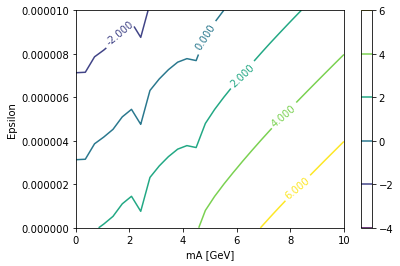

In [15]:

# contourPlot('100GevSomm900.csv','Tau_TauCross')
ContourPlot('100GevMaster900.csv','Tau_TauCrossSomm')

In [165]:
rawData = pd.read_csv('100GevSomm900.csv')
looprange = range(0,len(rawData['Counter']))

mAVector = []
epsilonVector = []

TauLow = 100.
TauHigh = 1000.
#############
# TauLow = 10.
# TauHigh = 50.
# Slope = 1.4773641119412082e-06
#

for i in looprange:
    testvalue = rawData.loc[i,'Tau_TauCross']
#     print (testvalue)
    if ( TauLow <= testvalue <= TauHigh):
        mA = rawData.loc[i,'mA']
        epsilon = rawData.loc[i,'Epsilon']
        mAVector.append(mA)
        epsilonVector.append(epsilon)
        
print ('Complete')

Complete


## Pull Slope of the Contours

#### Problem:
These plots take a very long time to generate and they don't resolve well. We need a way to make the calculations more efficient.

#### Solution:
Ignore the fact that we have a contour plot for a second. In the $(m_{A}, \varepsilon)$ plane, when there is no Sommerfeld enhancement, the slope of each line is constant. Straight lines are really easy to graph, so it would be great if we could determine the slope of the lines in the $(m_{A}, \varepsilon)$ plane. 

We argue that $\tau$ depends on $m_A$ and $\varepsilon$ only through $C_{Cap}$as follows:
$$ \tau = \frac{1}{\sqrt{C_{Cap}C_{Ann}}} \approx \frac{1}{\sqrt{C_{Cap}}} \quad \text{with} \quad 
C_{Cap} \approx \frac{m_A^2}{\varepsilon} so $$
$$ \tau \approx \frac{\varepsilon}{m_A^2} $$

We solve this for $\varepsilon$ and see:
$$ \log(\varepsilon) = 2\log(m_A) + \log(\tau)  $$

so the slope of the $\frac{\tau}{\tau_{\oplus}}$ contours is identically 2.


-----------------
https://python4mpia.github.io/fitting_data/least-squares-fitting.html

LinregressResult(slope=2.9410303514744378e-07, intercept=-1.959405579101386e-07, rvalue=0.80007757316237793, pvalue=2.0543686491788954e-30, stderr=1.941551534247803e-08)
Complete


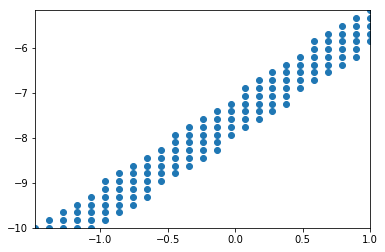

In [166]:
from scipy import stats

def FitFunction(x,a,b):
    return a*x+b

def LinPlot(xData,yData):
    xMin = min(xData)
    xMax = max(xData)
    yMin = min(yData)
    yMax = max(yData)
    
    
    plot = plt.scatter(np.log10(xData),np.log10(yData))
#     plt.axis([xMin,xMax,yMin,yMax])
    plt.axis([np.log10(xMin),np.log10(xMax),np.log10(yMin),np.log10(yMax)])

#     plt.xlabel('log(mA)')
#     plt.ylabel('log(Epsilon)')
#     plt.title('Tau between 10 - 100')
    return plot

LinPlot(mAVector,epsilonVector)

stats = stats.linregress(mAVector, epsilonVector)

print (stats)



print ('Complete')